# Final exam DSE 200

Your task in this take-home exam is to analyze the evolution of poverty and income distribution in the United States.

### Data source: 

https://www.census.gov/did/www/saipe/data/statecounty/data/index.html

Use the given code snippet to access the data files

The data fields are described here:https://www.census.gov/did/www/saipe/data/statecounty/data/2000.html 
Extract the required fields. The required fields are: 
   'State FIPS', 'County FIPS','Poverty Estimate All Ages', 'Poverty Percent All Ages', 
   'Poverty Estimate Under Age 18', 'Poverty Percent Under Age 18', 'Poverty Estimate Ages 5-17', 
   'Poverty Percent Ages 5-17', 'Median Household Income','Name','Postal'
 
### Pandas Data-Frames

1)
    - create a data frame with just the country-wide data
    - create a data frame with just the data of the states
    - create a data frame with just the data of the counties

    
2) Plot a graph of 'Poverty Percent All Ages' of the entire country vs year (line graph).
   Plot a graph of 'Median Household Income' of the entire country vs year (line graph)

3) Plot the total poverty in each state across the years and compare it with the country-wide poverty

4) Plot county-wide poverty stats

- Create a dataframe with the Unique FIPS code (obtained by combining the state and county FIPS), 'Poverty Percent All Ages' in every county in 2000, 'Poverty Percent All Ages' in every county in 2013 and the change ratio between 2000 and 2013. (change ratio = poverty % in 2013 / poverty % in 2000. Divide this by the nationwide change ratio for normalization. A value > 1 indicates that poverty is higher compared to the nation-wide poverty and a value < 1 indicates that poverty is lower compared to the nationwide poverty.)


FIPS code is a unique code to identify counties and states in the US. In this data you have been given state code and county code separately. You will have to combine the state code and the county code to generate a unique code for each place, which will be used to plot on the map. Please note that before combining, make sure the state code is 2 digits and county code is 3 digits by adding zeroes to the front.


- Plot the 'Poverty Percent All Ages' for each county on the map for the years 2000 and 2013.
- Plot the normalized change ratio on the map.
- Find the counties which witnessed the most positive and most negative change in poverty,

For this visualization, we will use a library called Vincent, which lets you plot data for places using their FIPS code instead of using latitude/longitude. 

To install vincent do
`pip install vincent` or `conda install vincent`


To use it in the notebook and display the maps inside the notebook do

`import vincent`

`vincent.core.initialize_notebook()`

You can find further details about how to use it here - http://wrobstory.github.io/2013/10/mapping-data-python.html and https://github.com/wrobstory/vincent

Before closing your notebook, please clear the output of the vincent maps as it becomes difficult of reload the notebook later. For plotting the counties on the map, you will need to use the file us_counties.topo.json present in the exam folder.

Tips: -  
    Check the type of datafields before operating on them. It will also help you debug for errors.
    Clean the data before using it. Drop those rows before using them.

In [228]:
import urllib2
import re

urls = ['https://www.census.gov/did/www/saipe/downloads/estmod93/est93ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod95/est95ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod97/est97ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod98/est98ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod99/est99ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod00/est00ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod01/est01ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod02/est02ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod03/est03ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod04/est04ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod05/est05ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod06/est06ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod07/est07ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod08/est08ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod09/est09ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod10/est10ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod11/est11all.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod12/est12ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod13/est13ALL.txt']

State_FIPS = []
County_FIPS = []
Poverty_Estimate_All_Ages = []
Poverty_Percent_All_Ages = []
Poverty_Estimate_Under_Age_18 = []
Poverty_Percent_Under_Age_18 = []
Poverty_Estimate_Ages_5_17 = []
Poverty_Percent_Ages_5_17 = []
Median_Household_Income = []
Name = []
Postal = []
URL = []

def getUrl(urls):
    for url in urls:
        response = urllib2.urlopen(url)
        lines = response.read().split('\n')
        del lines[-1]
        for i in lines:
            State_FIPS.append(i[0:2])
            County_FIPS.append(i[3:6])
            Poverty_Estimate_All_Ages.append(i[7:15])
            Poverty_Percent_All_Ages.append(i[34:38])
            Poverty_Estimate_Under_Age_18.append(i[49:57])
            Poverty_Percent_Under_Age_18.append(i[76:80])
            Poverty_Estimate_Ages_5_17.append(i[91:99])
            Poverty_Percent_Ages_5_17.append(i[118:122])
            Median_Household_Income.append(i[133:139])
            Name.append(i[193:238])
            Postal.append(i[239:241])
            URL.append(url)
                 
getUrl(urls)

In [328]:
import datetime as dt
import numpy as np

data = pd.DataFrame()
data['State FIPS'] = State_FIPS
data['County FIPS'] = County_FIPS
data['County FIPS'] = data['County FIPS'].str.lstrip(' ')
data['County FIPS'] = data['County FIPS'].str.zfill(3)
data['FIPS'] = data['State FIPS']+data['County FIPS']

data['Poverty Estimate All Ages'] = Poverty_Estimate_All_Ages
data['Poverty Estimate All Ages'] = data['Poverty Estimate All Ages'].apply(lambda x: re.sub("[^0-9]","", x))
#data['Poverty Estimate All Ages'] = data['Poverty Estimate All Ages'].apply(lambda x: int(x))
data['Poverty Estimate All Ages'] = pd.to_numeric(data['Poverty Estimate All Ages'], errors='coerce')
#Check with others if have empty row ie. ''

data['Poverty Percent All Ages'] = Poverty_Percent_All_Ages
data['Poverty Percent All Ages'] = pd.to_numeric(data['Poverty Percent All Ages'], errors='coerce')

data['Poverty Estimate Under Age 18'] = Poverty_Estimate_Under_Age_18
data['Poverty Estimate Under Age 18'] = pd.to_numeric(data['Poverty Estimate Under Age 18'], errors='coerce')

data['Poverty Percent Under Age 18'] = Poverty_Percent_Under_Age_18
data['Poverty Percent Under Age 18'] = pd.to_numeric(data['Poverty Percent Under Age 18'], errors='coerce')

data['Poverty Estimate Ages 5-17'] = Poverty_Estimate_Ages_5_17
data['Poverty Estimate Ages 5-17'] = pd.to_numeric(data['Poverty Estimate Ages 5-17'], errors='coerce')

data['Poverty Percent Under Age 5-17'] = Poverty_Percent_Ages_5_17
data['Poverty Percent Under Age 5-17'] = pd.to_numeric(data['Poverty Percent Under Age 5-17'], errors='coerce')

data['Median Household Income'] = Median_Household_Income
data['Median Household Income'] = pd.to_numeric(data['Median Household Income'], errors='coerce')

data['Name'] = Name
data['Postal'] = Postal
data['url'] = URL
data['year'] = data['url'].str[-9:-7]
data['year'] = data['year'].apply(lambda x: '19'+str(x) if int(x)>50 else '20'+str(x))
data['year'] = pd.to_datetime(data['year'])
data['year'] = data['year'].dt.year

print 'Complete dataset for data collected from all of the URLs"'
print data.shape
#Check datatypes of each column
cols = data.columns
print 'Check the datatypes of each column:'
for i in cols:
    print 'The datatype for %s is' %(i), type(data[i][0])

data.head()

Complete dataset for data collected from all of the URLs"
(60680, 14)
Check the datatypes of each column:
The datatype for State FIPS is <type 'str'>
The datatype for County FIPS is <type 'str'>
The datatype for FIPS is <type 'str'>
The datatype for Poverty Estimate All Ages is <type 'numpy.float64'>
The datatype for Poverty Percent All Ages is <type 'numpy.float64'>
The datatype for Poverty Estimate Under Age 18 is <type 'numpy.float64'>
The datatype for Poverty Percent Under Age 18 is <type 'numpy.float64'>
The datatype for Poverty Estimate Ages 5-17 is <type 'numpy.float64'>
The datatype for Poverty Percent Under Age 5-17 is <type 'numpy.float64'>
The datatype for Median Household Income is <type 'numpy.float64'>
The datatype for Name is <type 'str'>
The datatype for Postal is <type 'str'>
The datatype for url is <type 'str'>
The datatype for year is <type 'numpy.int64'>


,State FIPS,County FIPS,FIPS,Poverty Estimate All Ages,Poverty Percent All Ages,Poverty Estimate Under Age 18,Poverty Percent Under Age 18,Poverty Estimate Ages 5-17,Poverty Percent Under Age 5-17,Median Household Income,Name,Postal,url,year
0,00,000,00000,39264811.0,15.1,15727492.0,22.7,9814133.0,20.4,31241.0,United States,US,https://www.census.gov/did/www/saipe/downloads...,1993
1,01,000,01000,790351.0,18.8,288512.0,26.2,187081.0,24.2,25907.0,Alabama,AL,https://www.census.gov/did/www/saipe/downloads...,1993
2,01,001,01001,5862.0,15.2,2340.0,20.9,1507.0,19.0,30906.0,Autauga County,AL,https://www.census.gov/did/www/saipe/downloads...,1993
3,01,003,01003,15778.0,13.6,5970.0,19.9,3820.0,18.0,29040.0,Baldwin County,AL,https://www.census.gov/did/www/saipe/downloads...,1993
4,01,005,01005,6373.0,25.0,2411.0,32.9,1601.0,30.7,22446.0,Barbour County,AL,https://www.census.gov/did/www/saipe/downloads...,1993


### Q1: Create the dataframes

Download and parse the data files and create the following three pandas dataframes: (your dataframes should have data in the format shown below)

 * US_stat: statistics for the whole United States.
 * states_stat: Statistics for each state.
 * county_stat: Statistics for each county.

In [351]:
US_stat = data[data['FIPS'] == '00000']
US_stat = US_stat.set_index('year')
del US_stat['url']
US_stat.head()

,State FIPS,County FIPS,FIPS,Poverty Estimate All Ages,Poverty Percent All Ages,Poverty Estimate Under Age 18,Poverty Percent Under Age 18,Poverty Estimate Ages 5-17,Poverty Percent Under Age 5-17,Median Household Income,Name,Postal
year,,,,,,,,,,,,
1993,00,000,00000,39264811.0,15.1,15727492.0,22.7,9814133.0,20.4,31241.0,United States,US
1995,00,000,00000,36424609.0,13.8,14665019.0,20.8,9306018.0,18.7,34076.0,United States,US
1997,00,000,00000,35573858.0,13.3,14113067.0,19.9,9306705.0,18.4,37005.0,United States,US
1998,00,000,00000,34475762.0,12.7,13466544.0,18.9,8922935.0,17.5,38885.0,United States,US
1999,00,000,00000,32791272.0,11.9,12280321.0,17.1,8188068.0,15.9,40696.0,United States,US


In [362]:
states_stat = data[(data['County FIPS'] == '000') & (data['State FIPS'] != '00')]
states_stat = states_stat.sort_values(by=['Postal', 'year'])
states_stat = states_stat.set_index(['Postal', 'year'])
del states_stat['url']
states_stat.head()

State FIPS County FIPS   FIPS  Poverty Estimate All Ages  \
Postal year                                                            
AK     1993         02         000  02000                    67099.0   
       1995         02         000  02000                    60735.0   
       1997         02         000  02000                    68409.0   
       1998         02         000  02000                    65970.0   
       1999         02         000  02000                    53963.0   

             Poverty Percent All Ages  Poverty Estimate Under Age 18  \
Postal year                                                            
AK     1993                      11.2                        30628.0   
       1995                      10.1                        25270.0   
       1997                      11.2                        31968.0   
       1998                      10.8                        28014.0   
       1999                       8.8                        21176.0   

             Poverty Percent Under Age 18  Poverty Estimate Ages 5-17  \
Postal year                                                             
AK     1993                          15.9                     17496.0   
       1995                          13.2                     15234.0   
       1997                          16.2                     21786.0   
       1998                          14.6                     19387.0   
       1999                          11.2                     14137.0   

             Poverty Percent Under Age 5-17  Median Household Income  \
Postal year                                                            
AK     1993                            13.3                  39431.0   
       1995                            11.2                  42255.0   
       1997                            15.1                  43657.0   
       1998                            13.6                  47177.0   
       1999                            10.1                  49133.0   

                                                      Name  
Postal year                                                 
AK     1993  Alaska                                         
       1995  Alaska                                         
       1997  Alaska                                         
       1998  Alaska                                         
       1999  Alaska

In [365]:
county_stat = data[(data['State FIPS'] != '00') & (data['County FIPS'] != '000')]
county_stat = county_stat.sort_values(by=['Postal', 'FIPS', 'year'])
county_stat = county_stat.set_index(['Postal', 'FIPS', 'year'])
del county_stat['url']
county_stat.head()

State FIPS County FIPS  Poverty Estimate All Ages  \
Postal FIPS  year                                                     
AK     02013 1993         02         013                      224.0   
             1995         02         013                      242.0   
             1997         02         013                      322.0   
             1998         02         013                      265.0   
             1999         02         013                      240.0   

                   Poverty Percent All Ages  Poverty Estimate Under Age 18  \
Postal FIPS  year                                                            
AK     02013 1993                       9.7                           64.0   
             1995                      10.3                           72.0   
             1997                      14.2                          125.0   
             1998                      12.1                           85.0   
             1999                       8.9                           46.0   

                   Poverty Percent Under Age 18  Poverty Estimate Ages 5-17  \
Postal FIPS  year                                                             
AK     02013 1993                          11.0                        36.0   
             1995                          11.3                        44.0   
             1997                          20.8                        89.0   
             1998                          15.1                        72.0   
             1999                          10.0                        27.0   

                   Poverty Percent Under Age 5-17  Median Household Income  \
Postal FIPS  year                                                            
AK     02013 1993                             9.1                  46829.0   
             1995                            10.0                  46173.0   
             1997                            20.4                  42714.0   
             1998                            17.3                  40350.0   
             1999                             8.0                  39386.0   

                                                            Name  
Postal FIPS  year                                                 
AK     02013 1993  Aleutians East Borough                         
             1995  Aleutians East Borough                         
             1997  Aleutians East Borough                         
             1998  Aleutians East Borough                         
             1999  Aleutians East Borough

In [367]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Q2. Plot the US-wide statistics on poverty.

Plot the 'Poverty Percent All Ages' and 'Median Household Income' across entire US over the years. 

Compute the percentage of increase in poverty in the US between 2000 and 2013. - [poverty % in 2013] / [poverty % in 2000]

In [406]:
US_poverty_change = float(US_stat['Poverty Percent All Ages'][US_stat.index == 2013])/float(US_stat['Poverty Percent All Ages'][US_stat.index == 2000])

1.3982300884955752

poverty percent change ratio from 2000 to 2013 = 1.3982300885


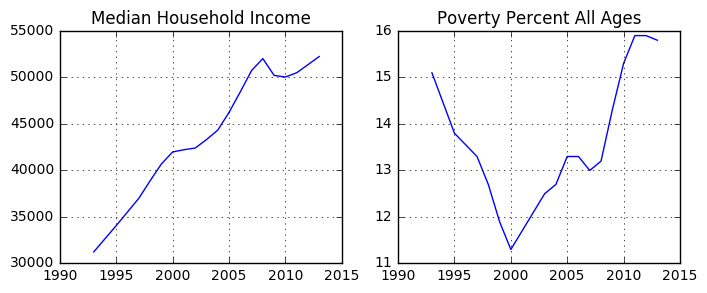

In [414]:
print 'poverty percent change ratio from 2000 to 2013 =', US_poverty_change

f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(8,3))

ax1.plot(US_stat.index, US_stat['Median Household Income'])
ax1.set_title('Median Household Income')
ax1.grid(True)
ax2.plot(US_stat.index, US_stat['Poverty Percent All Ages'])
ax2.set_title('Poverty Percent All Ages')
ax2.grid(True)

### 2000 was a good year

We see from these graphs that even though the median household in the US keeps increasing at a more or less constant rate, the poverty levels reached a minimum at 2000 and have increased dramatically , by 40% since then.

We will now attempt to identify the geographic distribution of the rise in poverty since 2000.

We start by plotting the time evolution of poverty for each of the states.

### Q3: Plot the change in poverty percentages by state.

For each state, plot the poverty levels across time and compare it with the nation-wide poverty level. Produce a graph similar to the ones below.

A


IndexError: invalid index to scalar variable.

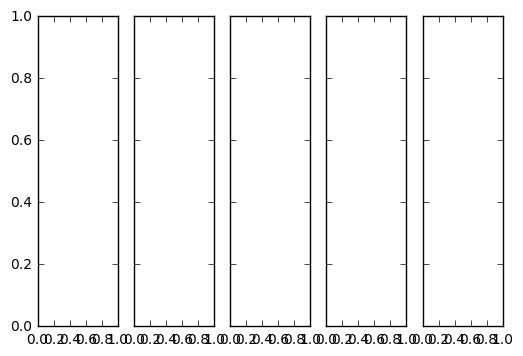

In [422]:
fig, axs = plt.subplots(ncols=5, sharex=True, sharey=True)
axs = axs.ravel()
i = 0
for state in states_stat.index[0]:
    print state[0]

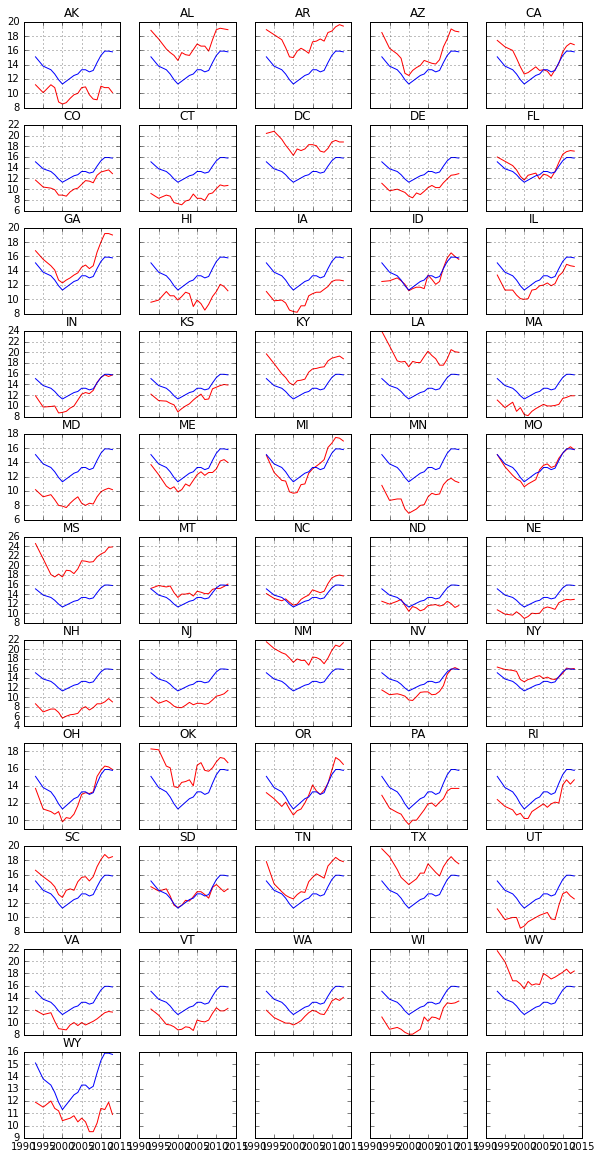

### Q4: plot poverty statistics by county

Using the vincent library and the dataframe `county_stat`, generate the following three maps.

1. Overall percentage of poverty for each county in 2000.
![poverty2000](Poverty2000.jpg)
1. Overall percentage of poverty for each county in 2013.
![poverty2013](Poverty2013.jpg)
1. Ratio between percentage of change in poverty from 2000 to 2013 for each county. Divided by the nation-wide change in poverty (1.39).
![povertyChange](PovertyChange.jpg)

### Q5: Identify the extremes.
Find out which are the counties in which the poverty percentage increased or decreased the most during the period 2000 - 2013.

County with max increase in poverty --  Story County in state  IA
change= 1.85120196526
County with max decrease in poverty --  Billings County in state  ND
change= 0.427484099677
